# Credit Card Fraud Detection

## Importing Required Dependencies

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Loading Dataset

In [40]:
df = pd.read_csv('creditcard.csv')

In [41]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
df.shape

(284807, 31)

In [43]:
# null value in data
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### In the dataset, There are no null values.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [45]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#### This Dataset is highly imbalanced, There are huge difference in number of fraud and non_fraud class.

In [46]:
fraud = df[df.Class == 1]
non_fraud = df[df.Class == 0]

In [47]:
non_fraud.shape

(284315, 31)

In [48]:
fraud.shape

(492, 31)

In [49]:
non_fraud['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [50]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#### The gap between mean value of amount of fraud and non_fraud class is high.

In [51]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Under-Sampling

In [52]:
new_non_fraud = non_fraud.sample(n = fraud.shape[0])

In [53]:
new_non_fraud.shape

(492, 31)

In [54]:
new_df = pd.concat([new_non_fraud, fraud], axis = 0)

In [55]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
105500,69556.0,-0.578533,-0.054604,1.322690,-1.262552,0.134594,-1.273845,0.237427,-0.122758,-2.012277,...,0.036195,-0.226547,0.099056,0.512082,-0.290383,-0.600050,0.074842,0.128301,18.94,0
89769,62716.0,-0.437869,0.824720,1.405516,-0.202002,-0.039209,-0.444424,0.438548,0.226527,-0.301181,...,-0.222897,-0.721599,-0.049702,-0.075662,-0.254438,0.081420,0.246884,0.102883,1.78,0
282605,171015.0,1.957789,-0.163433,-2.534451,0.208019,0.504526,-1.923527,1.153465,-0.716482,0.160510,...,0.336673,0.952559,-0.287306,0.140897,0.704761,0.448435,-0.123698,-0.073736,104.00,0
273566,165620.0,2.008470,-0.302754,-0.360221,0.314854,-0.704613,-0.776874,-0.493186,-0.055980,1.442223,...,-0.136484,-0.285410,0.344034,-0.189031,-0.371380,-0.914595,0.054620,-0.029930,1.00,0
38329,39346.0,-1.539445,0.999175,1.790414,0.010439,-0.960516,0.731573,-0.906118,1.381232,-0.107353,...,0.102570,0.038007,-0.168757,-0.304815,0.087509,0.378507,-0.326010,-0.078331,6.49,0


In [56]:
new_df.shape

(984, 31)

In [57]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88062.777439,-2.348111,1.811425,-3.568011,2.232573,-1.494224,-0.663214,-2.797882,0.280504,-1.339518,...,0.377070,-0.001843,-0.028984,-0.043528,0.031229,0.030509,0.100324,0.033255,99.496148,0.500000
std,47856.502975,5.531892,3.695742,6.194069,3.228204,4.266901,1.805949,5.852923,4.879234,2.283823,...,2.809334,1.169142,1.185434,0.579954,0.675497,0.478419,1.012877,0.423141,226.052083,0.500254
min,406.000000,-30.552380,-13.489450,-31.103685,-4.304665,-22.105532,-7.810116,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.201717,-7.263482,-2.882242,0.000000,0.000000
25%,46831.500000,-2.871640,-0.154586,-5.113334,-0.095998,-1.731145,-1.606496,-3.078361,-0.209685,-2.345829,...,-0.175411,-0.542923,-0.247714,-0.400890,-0.299424,-0.294020,-0.063707,-0.059634,1.275000,0.000000
50%,79536.500000,-0.766583,0.943748,-1.433541,1.299489,-0.420517,-0.633123,-0.622989,0.176186,-0.734376,...,0.148936,0.013141,-0.036548,0.004688,0.054148,-0.008619,0.046427,0.029640,19.930000,0.500000
75%,134160.000000,1.084402,2.791569,0.207782,4.202830,0.589207,0.140498,0.291255,0.925583,0.124651,...,0.664181,0.594901,0.198883,0.374403,0.398974,0.324074,0.455031,0.219111,99.990000,1.000000
max,172544.000000,2.352251,22.057729,2.806919,12.114672,13.815072,6.474115,5.802537,20.007208,5.191656,...,27.202839,8.361985,5.466230,3.437028,2.208209,2.745261,5.352193,1.779364,3208.620000,1.000000


In [58]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [59]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95378.747967,0.075727,-0.000927,-0.102741,-0.076883,0.162776,0.071309,-0.027034,-0.009628,-0.097913,...,-0.034542,0.040551,-0.017735,-0.017659,0.018073,0.021009,0.009370,0.030074,-0.009157,76.780976
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Spliting of Data

In [60]:
x = new_df.drop(columns= ['Class'], axis = 1)
y = new_df['Class']

In [61]:
x.shape

(984, 30)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.20, random_state= 42)

### Scaling

In [70]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Logistic Regression Model

In [73]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)


In [74]:
log_reg.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [75]:
log_predict = log_reg.predict(x_test_scaled)

In [77]:
acc_score = accuracy_score(log_predict, y_test)
acc_score

0.9390862944162437

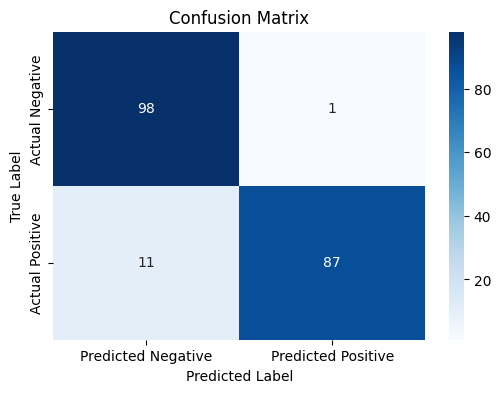

In [95]:
cm_log = confusion_matrix(y_test, log_predict)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [91]:
print(classification_report(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        99
           1       0.99      0.89      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



## Support Vector Machine Model

In [79]:
svm_model = svm.SVC(kernel='linear')

In [80]:
svm_model.fit(x_train_scaled, y_train)

SVC(kernel='linear')

In [81]:
svm_predict = svm_model.predict(x_test_scaled)

In [82]:
acc_score_svm = accuracy_score(svm_predict, y_test)
acc_score_svm

0.934010152284264

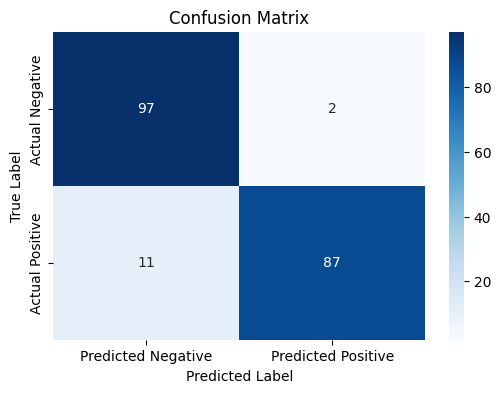

In [96]:
cm_svm = confusion_matrix(y_test, svm_predict)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [92]:
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       0.98      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



## Random Forest Classifier Model

In [85]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [86]:
rf_model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [87]:
rf_predict = rf_model.predict(x_test_scaled)

In [88]:
acc_score_rf = accuracy_score(rf_predict, y_test)
acc_score_rf

0.934010152284264

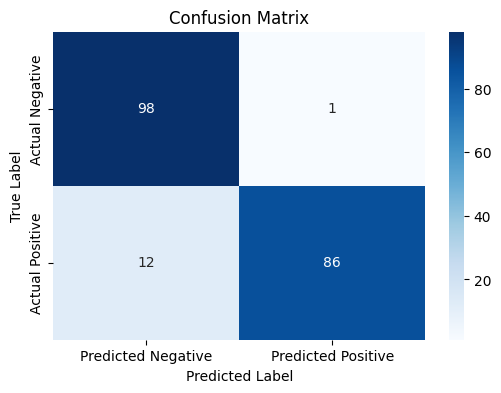

In [97]:
cm_rf = confusion_matrix(y_test, rf_predict)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [93]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        99
           1       0.99      0.88      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



#### The best model for this data is Logistic Regreesion
#### Accuracy on the testing data = 93.90%